In [1]:
# BASIC LIBRARY
from collections import Counter
import glob
from PIL import Image
import cv2
import numpy as np
from math import copysign,log10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# SKLEARN LIBRARY
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix,plot_roc_curve,\
    plot_confusion_matrix,roc_auc_score,precision_recall_curve,\
        classification_report
from skimage.feature import hog,local_binary_pattern
from skimage.transform import resize
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.feature_selection import RFE,RFECV

# DEEP LEARNING LIBRARY
import torch
from torch import nn,optim
import torchvision as T
import torch.nn.functional as F
from torchsummary import summary

In [3]:
root='/kagglecatsanddogs/PetImages'
label_names={'Cat':0,'Dog':1}
""" HuMoments H1,H2,H3,H4,H5,H6,H7 """
labels=[]
features=[]

for k,v in label_names.items():
    files=glob.glob(root+'/'+k+'/*')
    for f in files:
        image=cv2.imread(f,cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image=cv2.resize(image,(300,300))
            features.append(image)
            labels.append(v)

""" Below another two methods to classify the images and it follows the same procedure as above one
    only differnece which feature from the images are using and how the accuracy incresed as we choose 
    different methods irrespective of which classifier are using .
    Uncomment the code for the method you are opting.
"""    


"""HOG features """            
# label_names={'Cat':0,'Dog':1}


# labels=[]
# features=[]

# for k,v in label_names.items():
#     files=glob.glob(root+'/'+k+'/*')
#     for f in files:
#         image=cv2.imread(f,cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image=resize(image,(128*4,64*4))
#             fd,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2))
#             features.append(fd)
#             labels.append(v)    
# dataset=np.hstack((np.array(features),np.array(labels)))

""" Local Binar Pattern """
# label_names={'Cat':0,'Dog':1}


# labels=[]
# features=[]
# settings for LBP
# radius = 3
# numPoints = 8 * radius

# for k,v in label_names.items():
#     files=glob.glob(root+'/'+k+'/*')
#     for f in files:
#         image=cv2.imread(f,cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image=cv2.resize(image,(300,300))
#             lbp = local_binary_pattern(image,numPoints,
# 			                          radius, method="uniform")
# 		      hist, _ = np.histogram(lbp.ravel(),bins=np.arange(0,numPoints + 3),range=(0,numPoints + 2))
# 		   
# 		      hist = hist.astype("float")
# 		      hist /= (hist.sum() + 1e-7)  
#             features.append(hist)
#             labels.append(v)   
# dataset=np.hstack((np.array(features),np.array(labels)))

' Local Binar Pattern '

## Starts with basic Image processing to understands how an algorithm can differentiate objects using collected features are:-
1. Histogram
2. Orientation
3. Basic geometric features such as line,circle,rectangle,contours etc,.
4. Color
5. Localization
6. Pattern and many more
## In this notebook i'd used humoments to classify pet images and, i also mentioned other features which could be also useful to classify images
# Hu moments

[Image Moments](https://www.youtube.com/watch?v=AAbUfZD_09s])

[Hu Moments](https://www.youtube.com/watch?v=uEVrJrJfa0s)

[Calculation](https://www.youtube.com/watch?v=N2Yu4HFE50Q)
## Research Paper gives your the inside knowledge of application

[Paper 1](https://arxiv.org/pdf/2007.09859.pdf)

[Paper 2](https://link.springer.com/article/10.1007/s10044-018-0715-2)

[Paper 3](https://thesai.org/Downloads/Volume11No12/Paper_16-Enhancing_Convolutional_Neural_Network.pdf)

[Paper 4](https://ieeexplore.ieee.org/document/5485542)

[Paper 5](https://www.atlantis-press.com/proceedings/icmmita-16/25868205)

# HOG Features

[Link 1](https://www.vlfeat.org/overview/hog.html#:~:text=The%20HOG%20features%20are%20widely,a%20descriptor%20for%20each%20cell.)

[link 2](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/)

[link 3](https://medium.com/analytics-vidhya/a-take-on-h-o-g-feature-descriptor-e839ebba1e52)

# Local Binary Pattern

[link 1](https://medium.com/swlh/local-binary-pattern-algorithm-the-math-behind-it-%EF%B8%8F-edf7b0e1c8b3)

[link 2](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/)

In [4]:
dataframe=pd.DataFrame()

for i in range(len(features)):
    moments=cv2.moments(features[i])
    HuMoments=cv2.HuMoments(moments)
    if np.count_nonzero(HuMoments)==len(HuMoments):
        dataframe.loc[i,'H1']=-1.0*copysign(1.0,HuMoments[0])*log10(abs(HuMoments[0]))
        dataframe.loc[i,'H2']=-1.0*copysign(1.0,HuMoments[1])*log10(abs(HuMoments[1]))
        dataframe.loc[i,'H3']=-1.0*copysign(1.0,HuMoments[2])*log10(abs(HuMoments[2]))
        dataframe.loc[i,'H4']=-1.0*copysign(1.0,HuMoments[3])*log10(abs(HuMoments[3]))
        dataframe.loc[i,'H5']=-1.0*copysign(1.0,HuMoments[4])*log10(abs(HuMoments[4]))
        dataframe.loc[i,'H6']=-1.0*copysign(1.0,HuMoments[5])*log10(abs(HuMoments[5]))
        dataframe.loc[i,'H7']=-1.0*copysign(1.0,HuMoments[6])*log10(abs(HuMoments[6]))
        dataframe.loc[i,'label']=labels[i]

<AxesSubplot:>

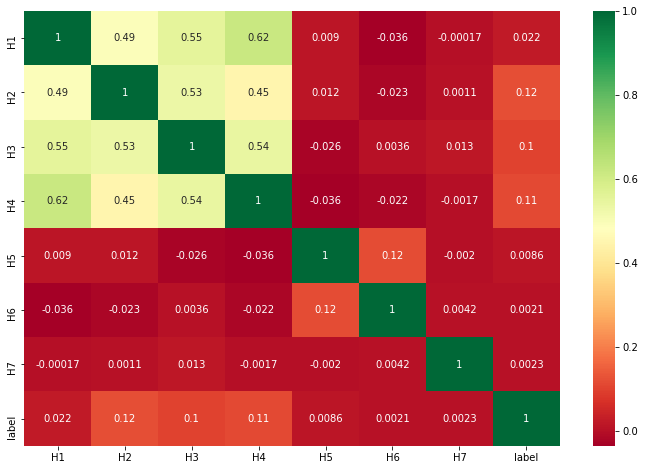

In [5]:
%matplotlib inline
corr_matrix=dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

(array([2495.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2494.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

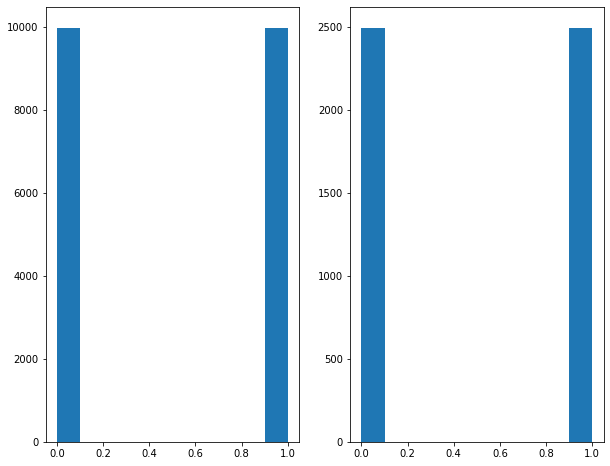

In [6]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
X,y=dataframe.drop('label',axis=1),dataframe['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)
# stratify to balace the labels both in train and test

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.hist(y_train)
plt.subplot(1,2,2)
plt.hist(y_test)

In [7]:
""" Feature Selection """
# Support Vector Machine
svc=SVC(kernel='rbf',C=1.0)
def drop_feature(est,X,y):
    base_score=np.mean(cross_val_score(est,X,y,cv=6))
    feature_drop=[]
    for f in X.columns:
        X_new=X.drop(f,axis=1)
        this_score=np.mean(cross_val_score(est,X_new,y,cv=6))
        if this_score>base_score:
            feature_drop.append(True)
        else:
            feature_drop.append(False)
    return np.array(feature_drop)
feature_drop=drop_feature(svc,X_train,y_train) 
print(feature_drop)   
    
X_train_new=X_train.loc[:,['H2','H3']]
X_test_new=X_test.loc[:,['H2','H3']]

[False False  True  True  True  True  True]


In [8]:
""" Parameters selection """
params=dict(C=[1,10,100,100],gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clf=RandomizedSearchCV(SVC(),params,scoring='accuracy',cv=10,n_jobs=-1,random_state=42)
clf.fit(X_train_new,y_train)
clf_best_params=clf.best_params_
clf_best_score=clf.best_score_
print(clf_best_params,clf_best_score)
svc=SVC(kernel='rbf',C=100,gamma=0.4)
svc.fit(X_train_new,y_train)
y_pred=svc.predict(X_test_new)

{'gamma': 0.4, 'C': 100} 0.5503882702748857


[[1427 1068]
 [1134 1360]]


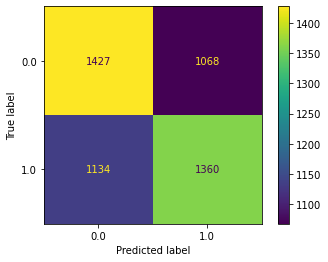

0.5586263143769497


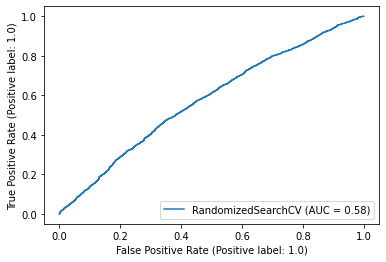

In [9]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(svc, X_test_new, y_test)
plt.show()
print(roc_auc_score(y_test, y_pred))
plot_roc_curve(clf, X_test_new, y_test)
plt.show()

In [10]:
print('Feature selected:',classification_report(y_test, y_pred, target_names=['Cat','Dog']))

svc=SVC(kernel='rbf',C=100,gamma=0.4)
svc.fit(X_train,y_train)
print('Original Feature:',classification_report(y_test, svc.predict(X_test), target_names=['Cat','Dog']))

Feature selected:               precision    recall  f1-score   support

         Cat       0.56      0.57      0.56      2495
         Dog       0.56      0.55      0.55      2494

    accuracy                           0.56      4989
   macro avg       0.56      0.56      0.56      4989
weighted avg       0.56      0.56      0.56      4989

Original Feature:               precision    recall  f1-score   support

         Cat       0.54      0.53      0.54      2495
         Dog       0.54      0.54      0.54      2494

    accuracy                           0.54      4989
   macro avg       0.54      0.54      0.54      4989
weighted avg       0.54      0.54      0.54      4989



In [11]:
# Extra Tree Classifier
etc_clf=ExtraTreesClassifier(n_estimators=100)
print(etc_clf)

ExtraTreesClassifier()


In [12]:
etc_clf.fit(X_train,y_train)
score_original=etc_clf.score(X_train,y_train)
print(score_original)
etc_clf.fit(X_train_new,y_train)
score_feature_selected=etc_clf.score(X_train_new,y_train)
print(score_feature_selected)

0.9999498872463042
0.9999498872463042


[[1337 1158]
 [1207 1287]]


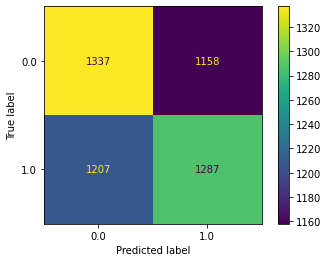

0.5259551179343451


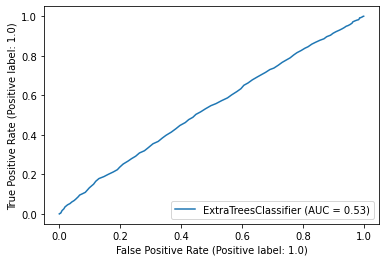

In [13]:
y_pred=etc_clf.predict(X_test_new)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(etc_clf, X_test_new, y_test)
plt.show()
print(roc_auc_score(y_test, y_pred))
plot_roc_curve(etc_clf, X_test_new, y_test)
plt.show()

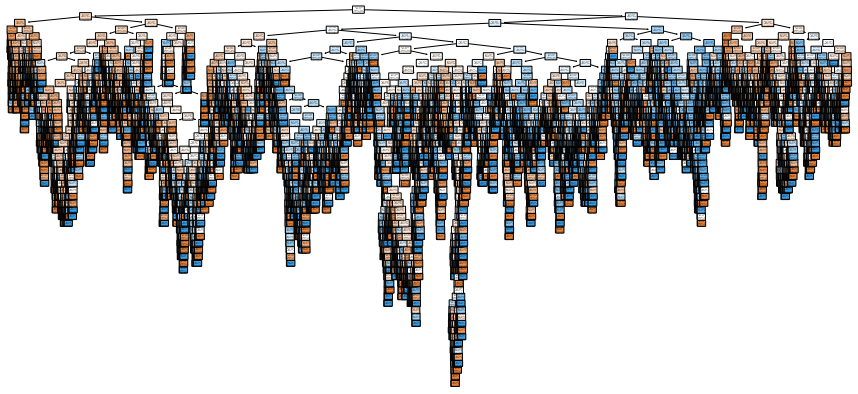

In [14]:
# Decision Tree Classifier
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)

plt.figure(figsize=(15,7))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['Cat','Dog'],feature_names=X_train.columns)
plt.show()

<AxesSubplot:xlabel='alpha'>

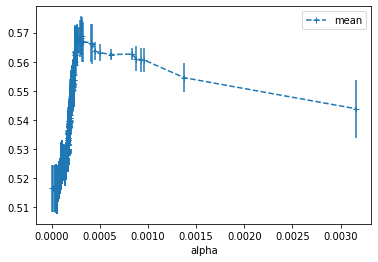

In [15]:
# Above Image can't able to understand because of complex trees
""" Decision tree Pruning """
alphas=clf_dt.cost_complexity_pruning_path(X_train, y_train).ccp_alphas[:-1]

alpha_loop_values=[]
for alpha in alphas:
    clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=6)
    alpha_loop_values.append([alpha,np.mean(scores),np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean','std'])
# Choose alpha from the alpha_results plot 
alpha_results.plot(x='alpha',y='mean',yerr='std',marker='+',linestyle='--')

In [19]:
# Ranking of feature based on Random Forest Classifier method
selector=RFE(RandomForestClassifier(),n_features_to_select=4,step=1)
selector=selector.fit(X_train,y_train)
print(selector.ranking_)

[1 1 1 1 4 2 3]


### Don't worry if accuracy not so good, the only thing is that you have to understand the types of feature available for an image classification that it can inpurt into ML algorithm to produce output labels.

### Above code is based upon ML to classify cats and dogs and their accuracy will not so much good, but pretty useful to undestand the basic Image Processing before jumping to advanced version otherwise you don't understand why we use kernel convolution to prepare feature maps.

In [2]:
""" In deep learning the convolution part is basic and but all the features is going from one Neuron layer to
                         another is like a black box """

# Basic configuartion of Pytorch for cuda device and same results from the model predictions
torch.manual_seed(42)
np.random.seed(42)
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
root='/kagglecatsanddogs/PetImages'
label_names={'Cat':0,'Dog':1}
labels=[]
full_files=[]
for k,v in label_names.items():
    files=glob.glob(root+'/'+k+'/*')
    for f in files:
        image=cv2.imread(f)
        if image is not None :
            full_files.append(f)
            labels.append(v)
datasets=dict(path=full_files,labels=labels)
df=pd.DataFrame(datasets)           
df = df.sample(frac=1).reset_index(drop=True)
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [7]:
""" Custom Dataset """
class CatsandDogs(torch.utils.data.Dataset):
    def __init__(self,dataframe,transform):
        self.all_data=list(dataframe['path'])
        self.labels=torch.from_numpy(dataframe['labels'].values).view(-1)
        self.transform=transform
    def __len__(self):
        return len(self.all_data)
    
    def __getitem__(self, index):
        image=Image.open(self.all_data[index]).resize((300,300),2)
        image=self.transform(image)
        return image,self.labels[index]
        
train_transform=T.transforms.Compose([T.transforms.Grayscale(),T.transforms.ToTensor()])      
train_ds=CatsandDogs(train,train_transform)

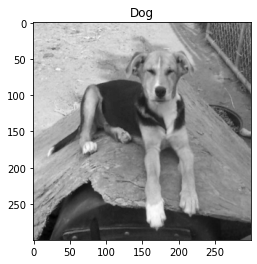

In [8]:
# Visualize any random image
ds=iter(train_ds)
image,label=next(ds)
tensor_to_PIL=T.transforms.ToPILImage()
image=tensor_to_PIL(image)
label='Dog' if label.item()==1 else 'Cat'
plt.title(label)
plt.imshow(image,cmap='gray');

In [9]:
images=torch.stack([image for image,_ in train_ds])
means=images.view(1,-1).mean(dim=1)
stds=images.view(1,-1).std(dim=1)

train,val=train_test_split(train,test_size=0.2,random_state=42)

train_transform=T.transforms.Compose([T.transforms.Grayscale(),
                                      T.transforms.ToTensor(),
                                      T.transforms.RandomHorizontalFlip(p=0.5),\
                                      T.transforms.RandomVerticalFlip(p=0.5),
                                      T.transforms.RandomAffine(degrees=40, scale=(.9, 1.1), shear=0),
                                      T.transforms.RandomPerspective(distortion_scale=0.2),
#                                      T.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                      T.transforms.RandomErasing(scale=(0.02, 0.16), ratio=(0.3, 1.6)),
                                      T.transforms.Normalize(mean=means.numpy(), std=stds.numpy()),
                                      ])
val_test_transform=T.transforms.Compose([T.transforms.Grayscale(),
                                         T.transforms.ToTensor(),
                                         T.transforms.Normalize(mean=means.numpy(),std=stds.numpy())])

train_ds=CatsandDogs(train,train_transform)
val_ds=CatsandDogs(val,val_test_transform)    
test_ds=CatsandDogs(test,val_test_transform)

batch_size=20
""" No need to shuffle in train_dl ,its already done before """
train_dl=torch.utils.data.DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=False)    
val_dl=torch.utils.data.DataLoader(dataset=val_ds,batch_size=batch_size,shuffle=False)    
test_dl=torch.utils.data.DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=False) 

>Create your own model or use pretrainde model where the parameters are already trained on ImageNet dataset. The model could be **Multilayer Perceptron (MLP)** or **Convolution Neural Network (CNN)** , below model is based on CNN.

In [10]:
""" User defined model """
class NNModel(nn.Module):
    def __init__(self):
        super(NNModel,self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=8,kernel_size=(3,3),stride=(1,1))
        self.conv2=nn.Conv2d(8,16,3,1)
        self.conv3=nn.Conv2d(16,32,3,1)
        self.conv4=nn.Conv2d(32,64,3,1)
        self.linear1=nn.Linear(16384,200,bias=True)
        self.linear2=nn.Linear(200,100,bias=True)
        self.linear3=nn.Linear(100,2,bias=True)
        self.dropout=nn.Dropout(0.3)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2(x),2))
        x=F.relu(F.max_pool2d(self.conv3(x),2))
        x=F.relu(F.max_pool2d(self.conv4(x),2))
        x=x.view(x.size(0),-1)
        x=self.dropout(self.linear1(x))
        x=self.dropout(self.linear2(x))
        x=self.dropout(self.linear3(x))
        x=F.log_softmax(x,dim=1)
        return x
model=NNModel()   
model=model.to(device)    
""" Pretrained model """
# model=T.model.alexnet(num_classes=2)
# model=model.to(device) 
# model=torch.log_softmax(model,dim=1)
# for param in model.parameters():
#   param.requires_grad=False
# Rest of the procedure is similar

' Pretrained model '

In [11]:
summary(model,input_size=(1,300,300))

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            80
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            3,277,000
├─Linear: 1-6                            20,100
├─Linear: 1-7                            202
├─Dropout: 1-8                           --
Total params: 3,321,686
Trainable params: 3,321,686
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            80
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            3,277,000
├─Linear: 1-6                            20,100
├─Linear: 1-7                            202
├─Dropout: 1-8                           --
Total params: 3,321,686
Trainable params: 3,321,686
Non-trainable params: 0

In [12]:
optimizer=optim.Adam(model.parameters(),lr=2e-4)
criterion=nn.NLLLoss()    
# define learning rate scheduler
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.5,patience=2,verbose=1) 
""" mode:'min' if we looking for loss otherwise 'max' for accuracy, see below the code you will understand """   

" mode:'min' if we looking for loss otherwise 'max' for accuracy, see below the code you will understand "

In [13]:
train_loss=[]
val_acc=[]
val_loss=[]
EPOCHS=20


for e in tqdm(range(EPOCHS)):
    train_losses=0.0
    val_losses=0.0
    acc=0.0
    for i,(images,targets) in enumerate(train_dl):
        model.train()
        images=torch.autograd.Variable(images).to(device)
        targets=torch.autograd.Variable(targets).to(device)
        outputs=model(images)
        optimizer.zero_grad()
        loss=criterion(outputs,targets)
        loss.backward()
        optimizer.step()
        train_losses+=loss.cpu().item()*targets.size(0)
        
        if i%3==0:
            model.eval()
            with torch.no_grad():
                for images,targets in val_dl:
                    images=torch.autograd.Variable(images).to(device)
                    targets=torch.autograd.Variable(targets).to(device)
                    outputs=model(images)
                    pred=torch.argmax(outputs,1)
                    acc+=(pred==targets).sum().item()*(100/targets.size(0))
                    loss=criterion(outputs,targets)
                    val_losses+=loss.cpu().item()*targets.size(0)
                val_acc.append(acc)    
                val_loss.append(val_losses/len(val_dl.sampler))
                
            print('Epoch {} and their validation loss {}'.format((e+1),(val_losses/len(val_dl.sampler))))
            print('Validation accuracy:',acc)     
    train_loss.append(train_losses/len(train_dl.sampler))        
    print('Epoch {} and their train loss {}'.format((e+1),train_loss[e]))
    lr_scheduler.step(train_loss[e])  

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1 and their validation loss 0.6961585094551285
Validation accuracy: 9808.333333333334
Epoch 1 and their validation loss 1.3882389772153332
Validation accuracy: 20000.000000000004
Epoch 1 and their validation loss 2.0926223543578972
Validation accuracy: 30191.66666666667
Epoch 1 and their validation loss 2.783096091482109
Validation accuracy: 40383.333333333336
Epoch 1 and their validation loss 3.4742586194035523
Validation accuracy: 51060.0
Epoch 1 and their validation loss 4.169717975393803
Validation accuracy: 60878.333333333336
Epoch 1 and their validation loss 4.86324529687245
Validation accuracy: 70766.66666666667
Epoch 1 and their validation loss 5.5595358597013895
Validation accuracy: 80580.0
Epoch 1 and their validation loss 6.256030043284736
Validation accuracy: 90403.33333333333
Epoch 1 and their validation loss 6.948026484919932
Validation accuracy: 100393.33333333333
Epoch 1 and their validation loss 7.636803172692985
Validation accuracy: 111771.66666666666
Epoch 1 an

  0%|          | 0/20 [20:42<?, ?it/s]


KeyboardInterrupt: 

# Above code is interrupted intentionally just as to explain how train the neural network.
### Train v/s Validation Loss
```
plt.figure(figsize=(12,6))
plt.title('Loss vs Epoch')

plt.plot(train_loss,np.arange(EPOCHS),label='Train',color='b')
plt.plot(val_loss,np.arange(EPOCHS),label='Validation',color='r')
plt.xlabel('Epoch')
plt.ylabel('Train loss/val loss')
plt.legend()
plt.show()
```

### While testing mode there is no need of model in cuda mode because it rqeuired mainly for fast  computation of gradient loss and updation of parameters in a model. One more reason is that if you are working for IOT devices, model should be evaluated on the basis of cpu mode in order to note the time from the prediction of an model.

```
model=model.cpu()
test_loss=[]
test_acc=[]
model.eval()  # Don't forget to do this it will turn off the dropout or batchnorm module
with torch.no_grad():
    test_losses=0.0
    acc=0.0
    for images,targets in test_dl:
        images=torch.autograd.Variable(images)
        targets=torch.autograd.Variable(targets)
        outputs=model(images)
        pred=torch.argmax(outputs,1)
        acc+=(pred==targets).sum().item()*(100/targets.size(0))
        loss=criterion(outputs,targets)
        test_losses+=loss.item()*targets.size(0)
    test_acc.append(acc)    
    test_loss.append(test_losses/len(val_dl.sampler))
                
print('Test loss {}'.format(test_loss))
print('Testing accuracy:',test_acc)
```  

## For deep inside of how to solve the problems, the datasets I'd used is downloaded from Kaggle Cat vs Dog competition there is number of notebooks where people developed their own intuition to classify it.
[Here is the link](https://www.kaggle.com/c/dogs-vs-cats)